# Phase II Analysis

The goal of phase II analysis is to discriminite between specific models (i.e. classifiers trained on parameter sets) on each of interest outcome. This notebook also memorializes images that are used in the final report

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

%matplotlib inline

## Load and Process Results DataFrames

In [3]:
rfdf = pd.read_csv('../results/phase_II_csv/RF_full_run.csv')
gbdf=pd.read_csv('../results/phase_II_csv/GB_phase2.csv')

phase2 = rfdf.append(gbdf).sort_values('model_key')
prefix = '(datetime.datetime('
pref_len = len(prefix)
phase2['year'] = phase2['testing_dates'].str.slice(start=pref_len, stop=pref_len+4)

phase2_2016 = phase2[phase2['year']=='2016']

In [4]:
phase2.head()

,Unnamed: 0,training_dates,testing_dates,model_key,classifier,parameters,feature_sets,outcome,model_result,auc-roc,...,r_at_30,r_at_50,f1_at_1,f1_at_2,f1_at_5,f1_at_10,f1_at_20,f1_at_30,f1_at_50,year
9483,9483,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2016, 1, 1, 0, 0), datetime...",BASELINE_DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10}","['demographic', 'economic']",top20_num,NaN,0.867787,...,0.768713,0.921407,0.049893,0.137322,0.310448,0.492552,0.610472,0.609315,0.520728,2016
3364,3364,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2010, 1, 1, 0, 0), datetime...",BASELINE_DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20}","['demographic', 'economic']",top20_num,NaN,0.706192,...,0.609316,1.000000,0.001431,0.001364,0.001199,0.000997,0.322268,0.483313,0.565661,2010
3363,3363,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2010, 1, 1, 0, 0), datetime...",BASELINE_DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10}","['demographic', 'economic']",top20_num,NaN,0.791094,...,0.691961,0.843727,0.001431,0.001364,0.146283,0.341974,0.525177,0.548868,0.477263,2010
3362,3362,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2010, 1, 1, 0, 0), datetime...",BASELINE_DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 5}","['demographic', 'economic']",top20_num,NaN,0.829670,...,0.653644,0.905334,0.000000,0.043656,0.211031,0.385842,0.553525,0.518474,0.512112,2010
3361,3361,"(datetime.datetime(2006, 1, 1, 0, 0), datetime...","(datetime.datetime(2010, 1, 1, 0, 0), datetime...",BASELINE_DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 1}","['demographic', 'economic']",top20_num,NaN,0.755115,...,0.477836,1.000000,0.001431,0.001364,0.001199,0.000997,0.000746,0.379023,0.565661,2010


In [5]:
phase2.describe()

,Unnamed: 0,auc-roc,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,p_at_30,p_at_50,r_at_1,...,r_at_20,r_at_30,r_at_50,f1_at_1,f1_at_2,f1_at_5,f1_at_10,f1_at_20,f1_at_30,f1_at_50
count,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,...,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000
mean,4685.357143,0.756900,0.645387,0.637789,0.641933,0.604142,0.563678,0.501815,0.418868,0.027018,...,0.468461,0.605811,0.805102,0.051735,0.098314,0.221534,0.351947,0.502447,0.538218,0.540827
std,3107.009726,0.157600,0.351636,0.334430,0.301945,0.278624,0.191747,0.104599,0.074319,0.018374,...,0.241759,0.234991,0.175732,0.034879,0.064285,0.132139,0.201312,0.217345,0.147939,0.072699
min,0.000000,0.379234,0.000000,0.000000,0.000000,0.000000,0.000000,0.064691,0.221798,0.000000,...,0.000000,0.095411,0.380865,0.000000,0.000000,0.000000,0.000000,0.000000,0.078069,0.297574
25%,1799.750000,0.620273,0.358209,0.389207,0.429412,0.390169,0.456416,0.442871,0.379971,0.011416,...,0.274249,0.401910,0.665180,0.021952,0.047572,0.121071,0.207427,0.336360,0.419829,0.513153
50%,4599.500000,0.740758,0.774194,0.744180,0.730769,0.678897,0.618663,0.535078,0.393280,0.023238,...,0.372768,0.515164,0.800314,0.045100,0.085575,0.191337,0.306916,0.469953,0.543029,0.555196
75%,7399.250000,0.923600,0.970149,0.941176,0.911334,0.859265,0.719298,0.588185,0.472449,0.048653,...,0.726796,0.863704,0.982963,0.092659,0.172389,0.368235,0.577109,0.722528,0.686204,0.570949
max,10199.000000,0.966757,1.000000,1.000000,1.000000,0.996800,0.810949,0.678926,0.749120,0.051724,...,0.815868,0.941356,1.000000,0.098361,0.187500,0.405586,0.647845,0.806511,0.754936,0.856568


## Model Performance
### 2016

In [6]:
# Set common graphic features
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 14})

Text(0.5,1,'Parameter Performance on AUC ROC 2016, Top 20%')

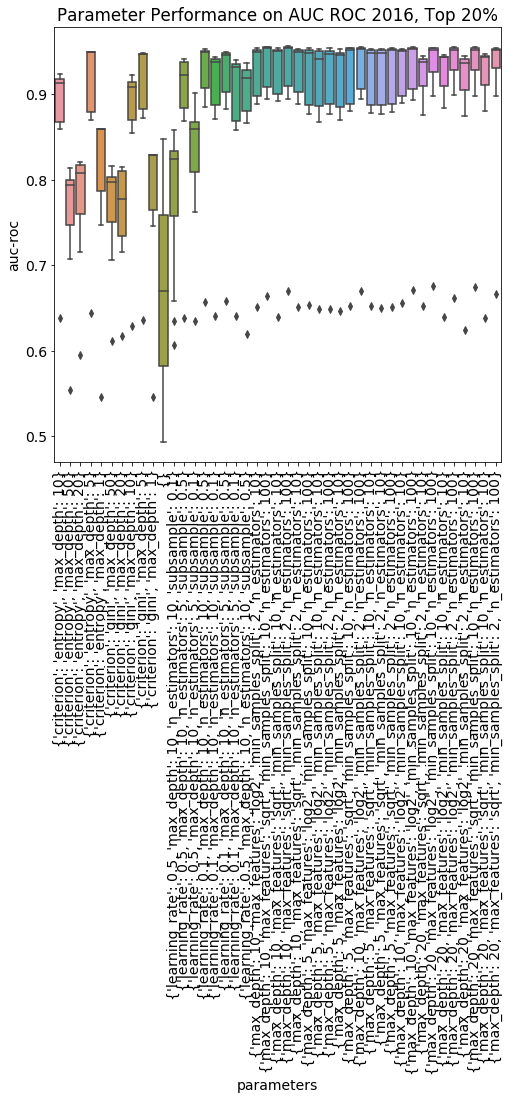

In [7]:
# Model Parameter Performance on AUC ROC, Top 20% by Number of Evictions
sns.boxplot(x='parameters', y='auc-roc', data=phase2_2016[phase2_2016['outcome']=='top20_num'])
plt.xticks(rotation=90)
plt.title('Parameter Performance on AUC ROC 2016, Top 20%')

Text(0.5,1,'Parameter Performance on AUC ROC 2016, >20% Increase in Evictions')

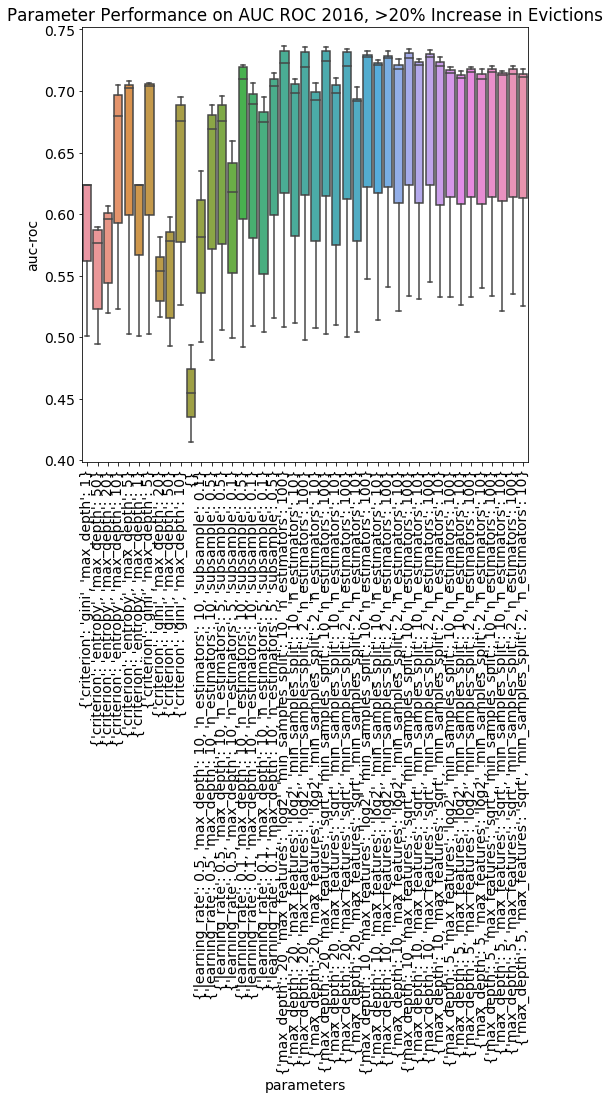

In [8]:
# Model Parameter Performance on AUC ROC, >20% Increase in Evictions
sns.boxplot(x='parameters', y='auc-roc', data=phase2_2016[phase2_2016['outcome']=='e_num_inc_20pct'])
plt.xticks(rotation=90)
plt.title('Parameter Performance on AUC ROC 2016, >20% Increase in Evictions')

Text(0.5,1,'Parameter Performance on Recall at 20% 2016, Top 20%')

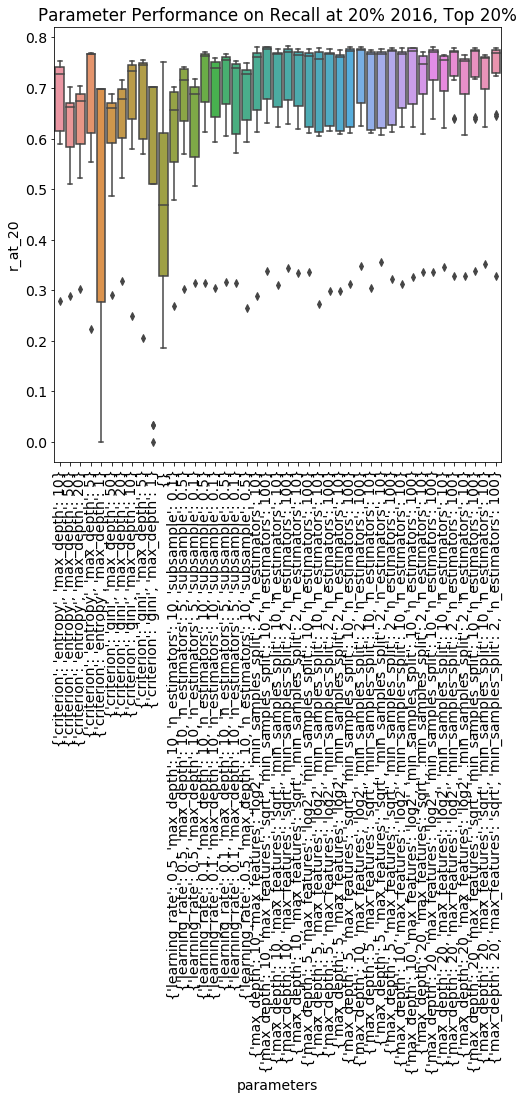

In [9]:
# Model Parameter Performance on Recall at 20%, Top 20% by Number of Evictions
sns.boxplot(x='parameters', y='r_at_20', data=phase2_2016[phase2_2016['outcome']=='top20_num'])
plt.xticks(rotation=90)
plt.title('Parameter Performance on Recall at 20% 2016, Top 20%')

Text(0.5,1,'Parameter Performance on Recall at 20% 2016, >20% Increase in Evictions')

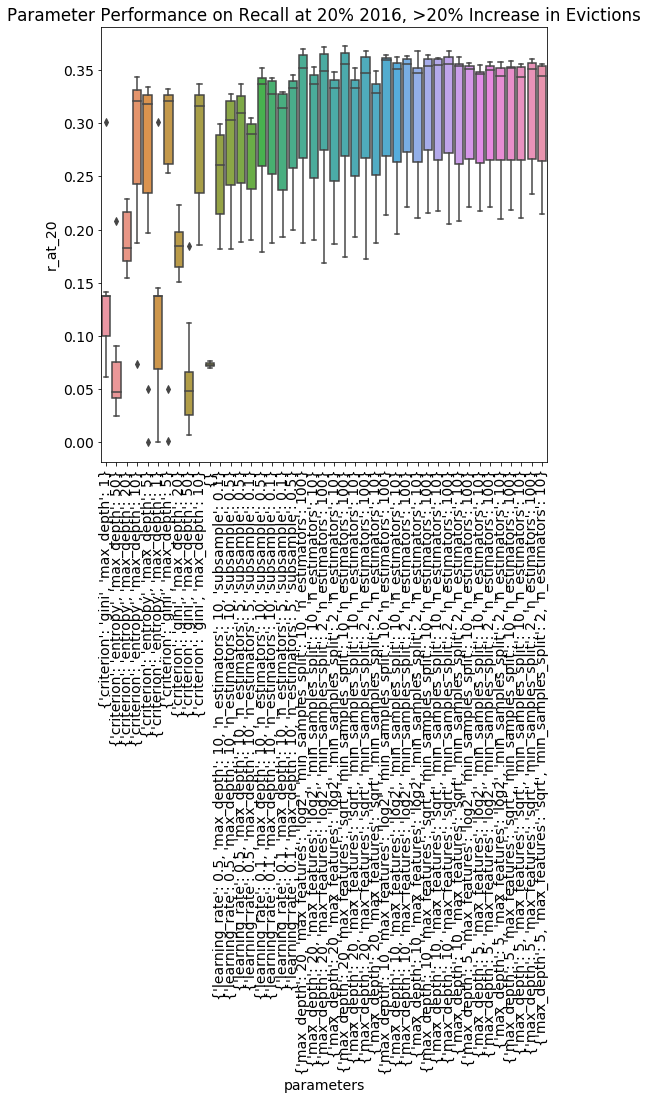

In [10]:
# Model Parameter Performance on Recall at 20%, >20% Increase in Evictions
sns.boxplot(x='parameters', y='r_at_20', data=phase2_2016[phase2_2016['outcome']=='e_num_inc_20pct'])
plt.xticks(rotation=90)
plt.title('Parameter Performance on Recall at 20% 2016, >20% Increase in Evictions')

### Best 5

In [11]:
# Selected slice number to generate 5 unique models by parameter set, excluding features 
find_params = phase2_2016[phase2_2016['outcome']=='top20_num'].sort_values(by='auc-roc', ascending=False)[0:14]
best5_params_top20 = find_params['parameters'].unique()
best5_top20_16 = phase2_2016[(phase2_2016['parameters'].isin(best5_params_top20)) & (phase2_2016['outcome']=='top20_num')][['model_key', 'parameters', 'outcome']]

best5_top20_16.head()


,model_key,parameters,outcome
9395,RF,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",top20_num
9393,RF,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",top20_num
9397,RF,"{'max_depth': 10, 'max_features': 'log2', 'min...",top20_num
9399,RF,"{'max_depth': 10, 'max_features': 'log2', 'min...",top20_num
9403,RF,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",top20_num


In [12]:
# Selected slice number to generate 5 unique models by parameter set, excluding features
find_params = phase2_2016[phase2_2016['outcome']=='e_num_inc_20pct'].sort_values(by='auc-roc', ascending=False)[0:10]
best5_params_inc20 = find_params['parameters'].unique()
best5_inc20_16=phase2_2016[(phase2_2016['parameters'].isin(best5_params_inc20)) & (phase2_2016['outcome']=='e_num_inc_20pct')][['model_key', 'parameters', 'outcome']]

best5_inc20_16.head()

,model_key,parameters,outcome
9373,RF,"{'max_depth': 20, 'max_features': 'log2', 'min...",e_num_inc_20pct
9371,RF,"{'max_depth': 20, 'max_features': 'log2', 'min...",e_num_inc_20pct
9369,RF,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",e_num_inc_20pct
9367,RF,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",e_num_inc_20pct
9429,RF,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",e_num_inc_20pct


In [13]:
# Top 20 best results df
best5_top20 = best5_top20_16.merge(phase2, how='inner', on=['model_key', 'parameters', 'outcome'])
best5_top20['_id'] = best5_top20.model_key.astype(str) + ', ' + best5_top20.parameters.astype(str) + ', ' + best5_top20.outcome.astype(str)#+ best5_top20.feature_sets.astype(str) + ', ' 
best5_top20 = best5_top20.sort_values('year', ascending=True)

# >20% best results df
best5_inc20 = best5_inc20_16.merge(phase2, how='inner', on=['model_key', 'parameters', 'outcome'])
best5_inc20['_id'] = best5_inc20.model_key.astype(str) + ', ' + best5_inc20.parameters.astype(str) + ', ' + best5_inc20.outcome.astype(str) #+ best5_inc20.feature_sets.astype(str) + ', ' 
best5_inc20 = best5_inc20.sort_values('year', ascending=True)

### Time Series

Text(0.5,1,'Best Models: Top 20% of Evictions by AUC ROC, 2007-2016')

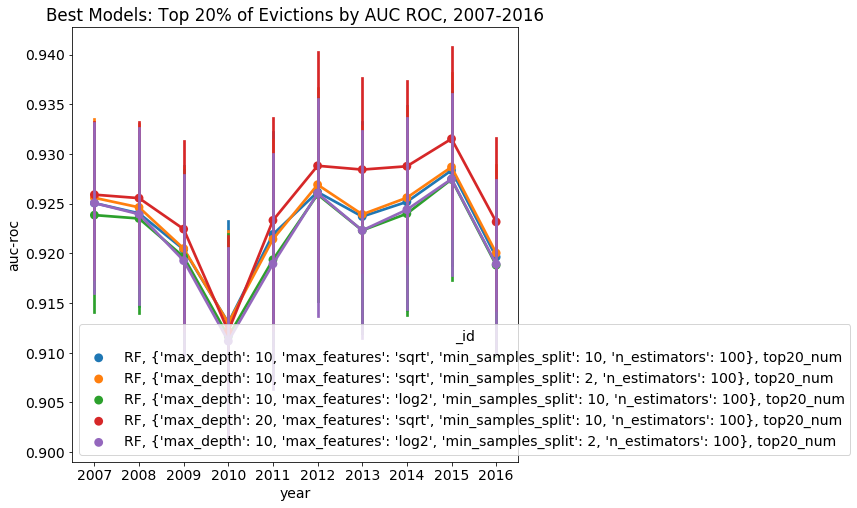

In [14]:
p = sns.pointplot(x="year", y="auc-roc", hue="_id", data=best5_top20)
plt.title("Best Models: Top 20% of Evictions by AUC ROC, 2007-2016")

Text(0,0.5,'AUC ROC')

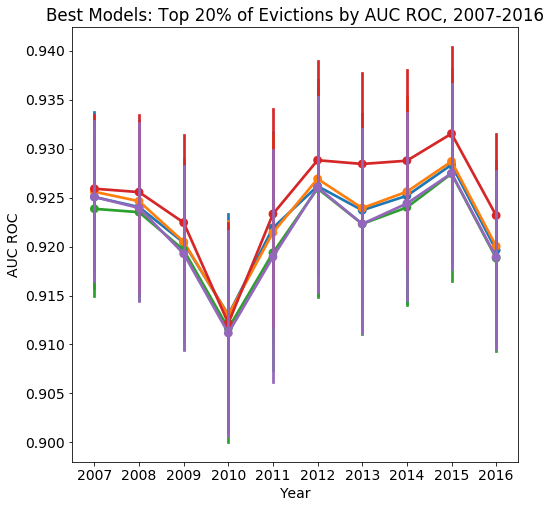

In [15]:
p = sns.pointplot(x="year", y="auc-roc", hue="_id", data=best5_top20)
plt.title("Best Models: Top 20% of Evictions by AUC ROC, 2007-2016")
p.legend().set_visible(False)
plt.xlabel('Year')
plt.ylabel('AUC ROC')

Text(0,0.5,'Recall at 20%')

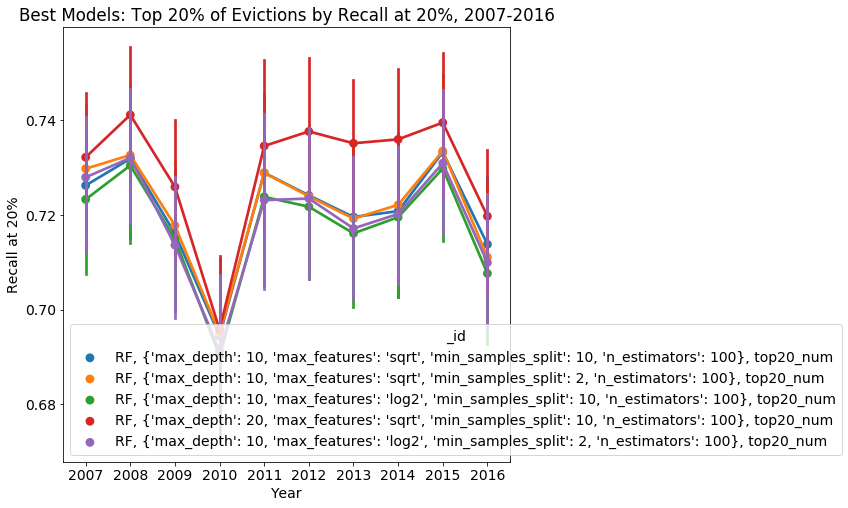

In [16]:
# Top 5 parameters sets on top
p = sns.pointplot(x="year", y="r_at_20", hue="_id", data=best5_top20)
plt.title("Best Models: Top 20% of Evictions by Recall at 20%, 2007-2016")
plt.xlabel('Year')
plt.ylabel('Recall at 20%')

Text(0,0.5,'AUC ROC')

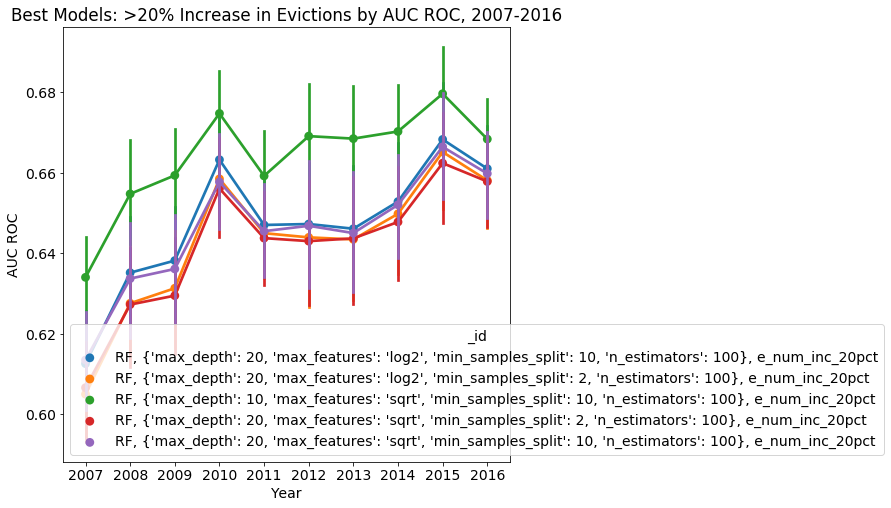

In [17]:
p = sns.pointplot(x="year", y="auc-roc", hue="_id", data=best5_inc20)
plt.title("Best Models: >20% Increase in Evictions by AUC ROC, 2007-2016")
plt.xlabel('Year')
plt.ylabel('AUC ROC')

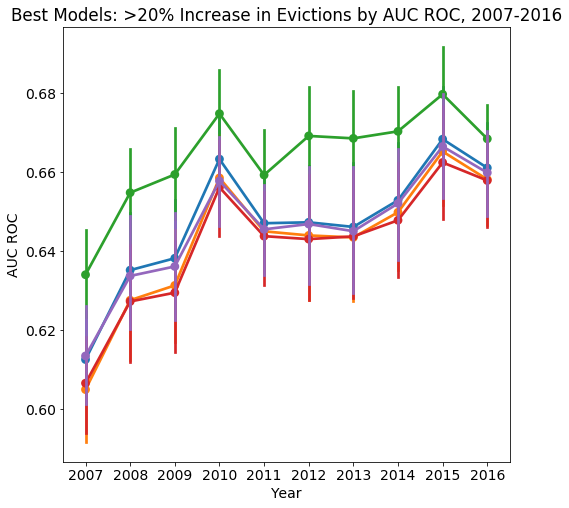

In [18]:
p = sns.pointplot(x="year", y="auc-roc", hue="_id", data=best5_inc20)
plt.title("Best Models: >20% Increase in Evictions by AUC ROC, 2007-2016")
plt.xlabel('Year')
plt.ylabel('AUC ROC')
p.legend().set_visible(False)

Text(0,0.5,'Recall at 20%')

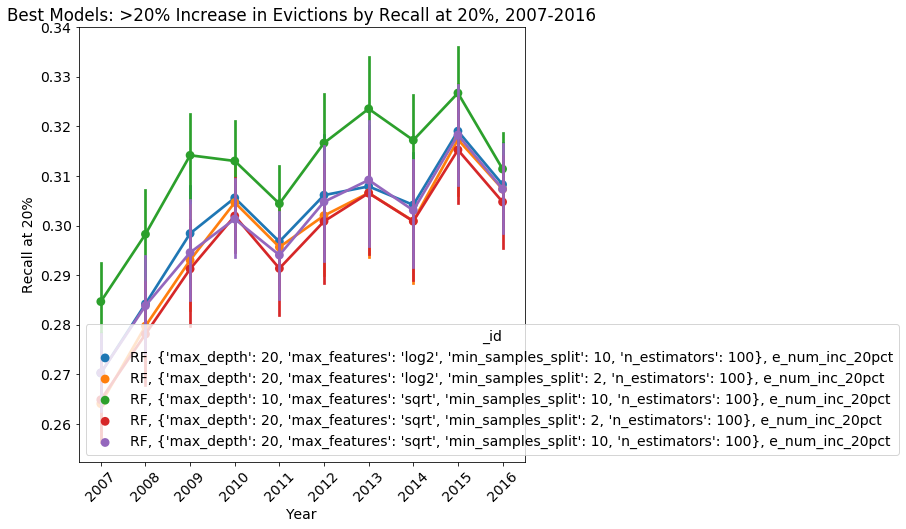

In [19]:
p = sns.pointplot(x="year", y="r_at_20", hue="_id", data=best5_inc20)
plt.xticks(rotation=45)
plt.title("Best Models: >20% Increase in Evictions by Recall at 20%, 2007-2016")
plt.xlabel('Year')
plt.ylabel('Recall at 20%')

### Feature Set Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

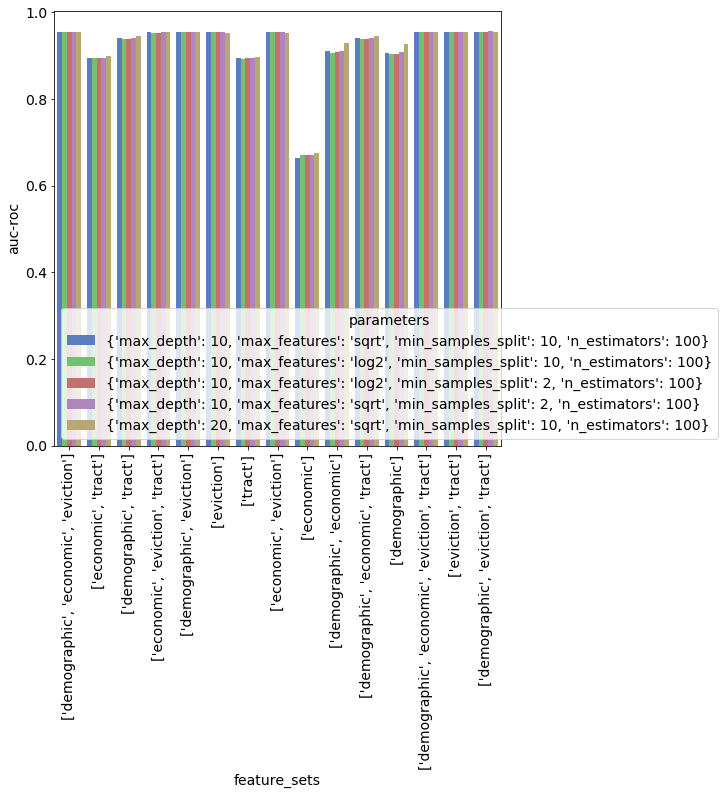

In [20]:
sns.barplot(x='feature_sets', y='auc-roc', hue = 'parameters', data=best5_top20[best5_top20['year']=='2016'], palette='muted')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

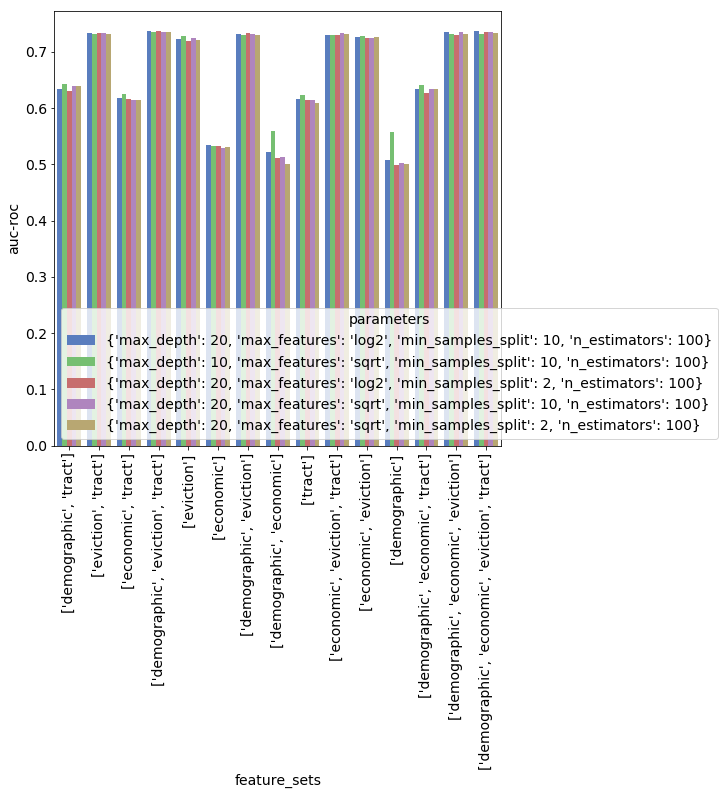

In [21]:
sns.barplot(x='feature_sets', y='auc-roc', hue = 'parameters', data=best5_inc20[best5_inc20['year']=='2016'], palette='muted')
plt.xticks(rotation=90)

## Parameters to use:

In [22]:
# Top 20%, all models are RF
best5_params_top20

array(["{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}",
       "{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}",
       "{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}",
       "{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}",
       "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}"],
      dtype=object)

In [23]:
# >20%, all models are RF
best5_params_inc20

array(["{'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}",
       "{'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}",
       "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}",
       "{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}",
       "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}"],
      dtype=object)

In [24]:
# Models to run on both outcomes:
[x for x in best5_params_top20 if x in best5_params_inc20]

["{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}",
 "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}"]

In [25]:
# Models to run on Top 20% only
[x for x in best5_params_top20 if x not in best5_params_inc20]

["{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}",
 "{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}",
 "{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}"]

In [26]:
# Models to run on >20% only
[x for x in best5_params_inc20 if x not in best5_params_top20]

["{'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}",
 "{'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}",
 "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}"]